In [124]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/election_results_2024.csv")
df.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [125]:
df.drop(columns = ['Const. No.'], inplace = True)

In [126]:
df['Margin'] = pd.to_numeric(df['Margin'], errors = 'coerce')

**1. TOP 10 LIST OF WINNING PARTIES**

In [4]:
wins = df.groupby('Leading Party')['Leading Party'].count()
wins = pd.DataFrame(wins)
wins = wins.rename(columns = {'Leading Party': 'WonCount'})
Won_seat = wins.sort_values(by = ['WonCount'], ascending = False)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
top10 = Won_seat.head(10)

<ipython-input-6-409845ad2a6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Leading Party', y = 'WonCount', data = top10, palette = 'viridis')


<Axes: xlabel='Leading Party', ylabel='WonCount'>

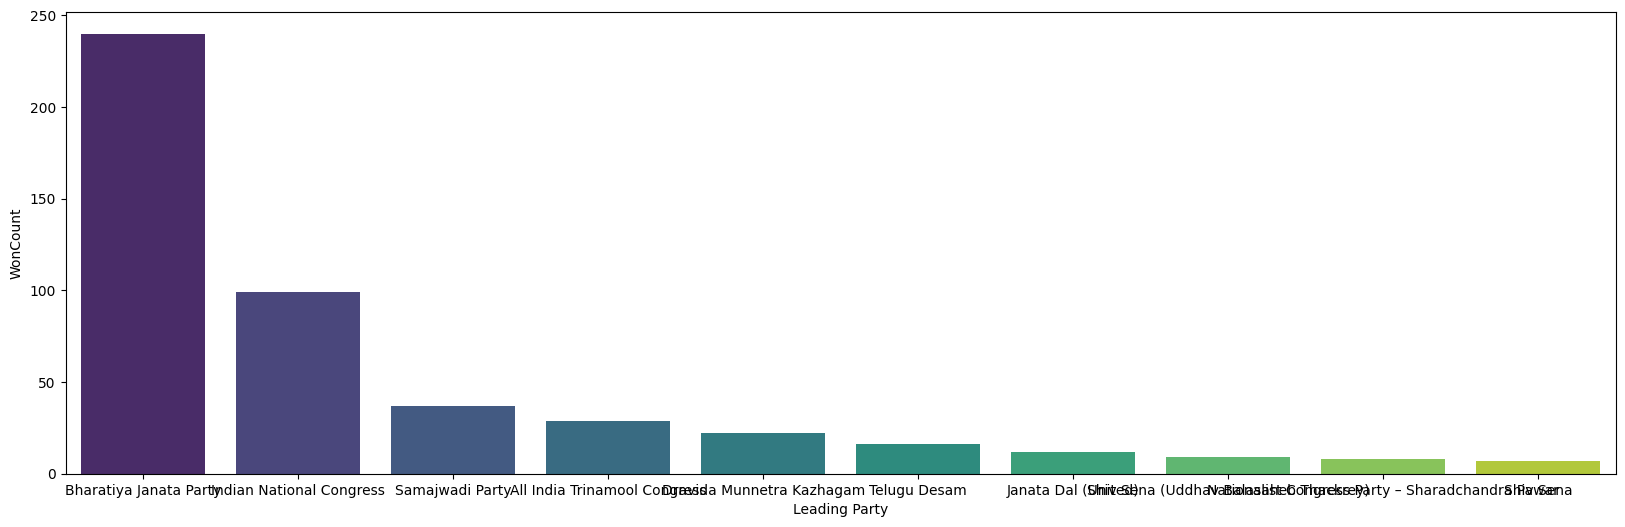

In [6]:
plt.figure(figsize=(20,6))
sns.barplot(x= 'Leading Party', y = 'WonCount', data = top10, palette = 'viridis')

**2. DETAIL FOR STAR MEMBERS**

In [ ]:
# RAHUL GANDHI , NARENDRA MODI, AMIT SHAH, NITIN JAIRAM GADKARI, AKHILESH YADAV

In [7]:
candidates = ['RAHUL GANDHI', 'NARENDRA MODI', 'AMIT SHAH', 'NITIN JAIRAM GADKARI', 'AKHILESH YADAV', 'SMRITI IRANI']

for c in candidates:
  # winner check
  if c in df['Leading Candidate'].values:
    row1 = df[df['Leading Candidate'] == c][['Leading Candidate','Constituency','Margin']]
    roww1 = pd.DataFrame(row1)
    print(roww1)
  # Loser check
  elif c in df['Trailing Candidate'].values:
    row2 = df[df['Trailing Candidate'] == c][['Trailing Candidate','Constituency','Margin']]
    print(row2)
  else:
    print('Not Participated')

    Leading Candidate Constituency    Margin
430      RAHUL GANDHI   Rae Bareli  390030.0
539      RAHUL GANDHI      Wayanad  364422.0
    Leading Candidate Constituency    Margin
533     NARENDRA MODI     Varanasi  152513.0
    Leading Candidate Constituency    Margin
186         AMIT SHAH  Gandhinagar  744716.0
        Leading Candidate Constituency    Margin
374  NITIN JAIRAM GADKARI       Nagpur  137603.0
    Leading Candidate Constituency    Margin
276    AKHILESH YADAV      Kannauj  170922.0
   Trailing Candidate Constituency    Margin
21       SMRITI IRANI       Amethi  167196.0


In [ ]:
# Alternate way

In [8]:
candidates = ['RAHUL GANDHI', 'NARENDRA MODI', 'AMIT SHAH', 'NITIN JAIRAM GADKARI', 'AKHILESH YADAV', 'SMRITI IRANI']
winner = df[df['Leading Candidate'].isin(candidates)][['Leading Candidate','Constituency','Margin']]
Loser = df[df['Trailing Candidate'].isin(candidates)][['Trailing Candidate','Constituency','Margin']]
pd.concat([winner, Loser], axis = 0)

,Leading Candidate,Constituency,Margin,Trailing Candidate
186,AMIT SHAH,Gandhinagar,744716.0,NaN
276,AKHILESH YADAV,Kannauj,170922.0,NaN
374,NITIN JAIRAM GADKARI,Nagpur,137603.0,NaN
430,RAHUL GANDHI,Rae Bareli,390030.0,NaN
533,NARENDRA MODI,Varanasi,152513.0,NaN
539,RAHUL GANDHI,Wayanad,364422.0,NaN
21,NaN,Amethi,167196.0,SMRITI IRANI


In [ ]:
# winning graph to check highest margin

In [37]:
candidates = ['RAHUL GANDHI', 'NARENDRA MODI', 'AMIT SHAH', 'NITIN JAIRAM GADKARI', 'AKHILESH YADAV', 'SMRITI IRANI']
winner = df[df['Leading Candidate'].isin(candidates)][['Leading Candidate','Constituency','Margin']]
winnerplot = winner.sort_values(by = ['Margin'], ascending = [False])
winnerplot

,Leading Candidate,Constituency,Margin
186,AMIT SHAH,Gandhinagar,744716.0
430,RAHUL GANDHI,Rae Bareli,390030.0
539,RAHUL GANDHI,Wayanad,364422.0
276,AKHILESH YADAV,Kannauj,170922.0
533,NARENDRA MODI,Varanasi,152513.0
374,NITIN JAIRAM GADKARI,Nagpur,137603.0


<Axes: xlabel='Constituency', ylabel='Margin'>

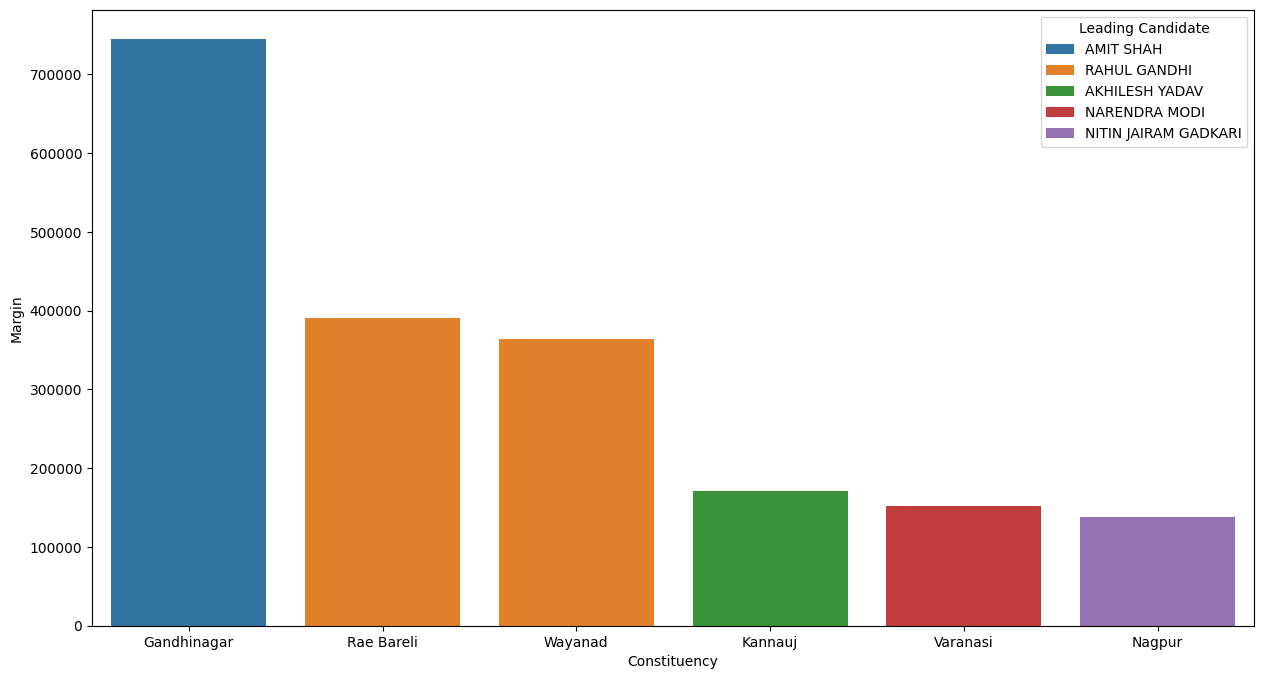

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x ='Constituency', y = 'Margin', hue ='Leading Candidate',data = winnerplot)

**3. Highest and lowest margin victory candidate**

In [ ]:
 # Candidate Name | Margin -> cond: Name from leading list

In [11]:
df['Margin'] = pd.to_numeric(df['Margin'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        543 non-null    object 
 1   Leading Candidate   543 non-null    object 
 2   Leading Party       543 non-null    object 
 3   Trailing Candidate  542 non-null    object 
 4   Trailing Party      542 non-null    object 
 5   Margin              542 non-null    float64
 6   Status              543 non-null    object 
dtypes: float64(1), object(6)
memory usage: 29.8+ KB


In [12]:
Victory = df[['Leading Candidate', 'Leading Party', 'Margin']]
Victory = Victory.sort_values(by=['Margin'], ascending=[False])
print(Victory)

                  Leading Candidate             Leading Party     Margin
221                 SHANKAR LALWANI    Bharatiya Janata Party  1175092.0
157                 RAKIBUL HUSSAIN  Indian National Congress  1012476.0
525           SHIVRAJ SINGH CHOUHAN    Bharatiya Janata Party   821408.0
384                       C R PATIL    Bharatiya Janata Party   773551.0
186                       AMIT SHAH    Bharatiya Janata Party   744716.0
..                              ...                       ...        ...
226              RAO RAJENDRA SINGH    Bharatiya Janata Party     1615.0
236         RABINDRA NARAYAN BEHERA    Bharatiya Janata Party     1587.0
40                ADV ADOOR PRAKASH  Indian National Congress      684.0
357        RAVINDRA DATTARAM WAIKAR                 Shiv Sena       48.0
493  MUKESHKUMAR CHANDRAKAANT DALAL    Bharatiya Janata Party        NaN

[543 rows x 3 columns]


In [13]:
Ask = str(input('Want to see Top or Bottom list?: T/B'))
if(Ask == 'T'):
  a= int(input('Enter the top value to display'))
  print(Victory.head(a))
else:
  b = int(input('Enter the bottom value to display'))
  print(Victory.tail(b))

Want to see Top or Bottom list?: T/BB
Enter the bottom value to display5
                  Leading Candidate             Leading Party  Margin
226              RAO RAJENDRA SINGH    Bharatiya Janata Party  1615.0
236         RABINDRA NARAYAN BEHERA    Bharatiya Janata Party  1587.0
40                ADV ADOOR PRAKASH  Indian National Congress   684.0
357        RAVINDRA DATTARAM WAIKAR                 Shiv Sena    48.0
493  MUKESHKUMAR CHANDRAKAANT DALAL    Bharatiya Janata Party     NaN




```
# This is formatted as code
```

**4. Vote % distribution by party**

In [ ]:
# Leading Party details

In [15]:
# Total Votes by party
# sum(Votes) filtered by leading and trailing party
# graph: x: sum(votes by party) y: Margin column

In [67]:
leadingvotes = df.groupby('Leading Party')['Margin'].sum()
leadingvotes = pd.DataFrame(leadingvotes)
leadingvotes = leadingvotes.sort_values(by = 'Margin', ascending = False)

In [58]:
def vote(x, leadingvotes, margin_col):
  per = x / leadingvotes[margin_col].sum()
  per = per*100
  return(per)

In [83]:
leadingvotes['Perct_Vote'] = leadingvotes['Margin'].apply(lambda x: vote(x, leadingvotes,'Margin'))
leadingvotes = leadingvotes.reset_index()

In [75]:
lead_top10 = leadingvotes.head(10).reset_index()
lead_top10

,Leading Party,Margin,Perct_Vote
0,Bharatiya Janata Party,46081536.0,52.369104
1,Indian National Congress,13005922.0,14.780507
2,Dravida Munnetra Kazhagam,5081582.0,5.774935
3,All India Trinamool Congress,4910963.0,5.581036
4,Telugu Desam,3660927.0,4.160440
5,Samajwadi Party,2869566.0,3.261102
6,Janata Dal (United),1386413.0,1.575581
7,Shiv Sena (Uddhav Balasaheb Thackrey),1015430.0,1.153980
8,Communist Party of India (Marxist),746237.0,0.848057
9,Lok Janshakti Party(Ram Vilas),720603.0,0.818925


([<matplotlib.patches.Wedge at 0x7a347b9b6c80>,
 [Text(-0.6424502253777664, -0.8928928871438373, 'Bharatiya Janata Party'),
  Text(1.0960349320954124, -0.0933135982941661, 'Indian National Congress'),
  Text(0.9314919643182213, 0.5850835157570085, 'Dravida Munnetra Kazhagam'),
  Text(0.6685057374489538, 0.8735559964866767, 'All India Trinamool Congress'),
  Text(0.3742562575134179, 1.0343752963562358, 'Telugu Desam'),
  Text(0.12513946205698365, 1.0928586894178447, 'Samajwadi Party'),
  Text(-0.04172282580950722, 1.0992084451124224, 'Janata Dal (United)'),
  Text(-0.13571303625155437, 1.091596066222018, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(-0.20405628890078875, 1.080907503424802, 'Communist Party of India (Marxist)'),
  Text(-0.26035756175670727, 1.0687440947374178, 'Lok Janshakti Party(Ram Vilas)'),
  Text(-0.31482879200047126, 1.0539842654079443, 'Nationalist Congress Party – Sharadchandra Pawar'),
  Text(-0.36780729372802384, 1.0366859672439226, 'Indian Union Muslim Leag

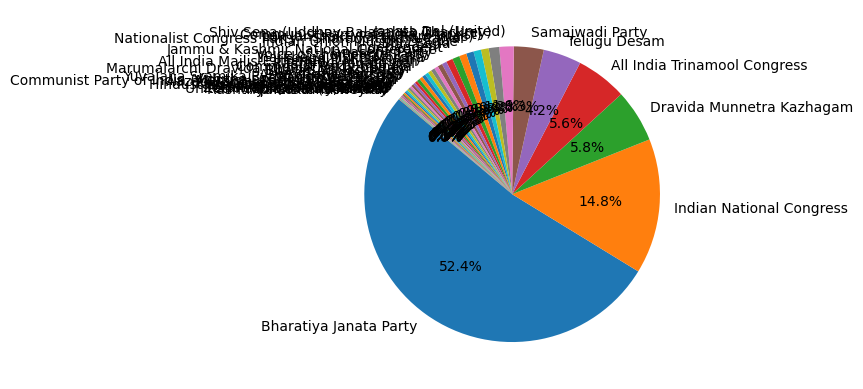

In [84]:
plt.pie(leadingvotes['Margin'], labels=leadingvotes['Leading Party'], autopct='%1.1f%%', startangle=140)


In [ ]:
# Trailing Party details

In [105]:
Trailing_votes = df.groupby('Trailing Party')['Margin'].sum().reset_index()
Trailing_votes = Trailing_votes.sort_values(by = 'Margin', ascending = False)

def trail(x,Trailing_votes,Margin_col):
  t = x/Trailing_votes['Margin'].sum()
  t = t*100
  return(t)

Trailing_votes['Tperc'] = Trailing_votes['Margin'].apply(lambda x : trail(x,Trailing_votes,'Margin'))
Trailplot = Trailing_votes.head(8)

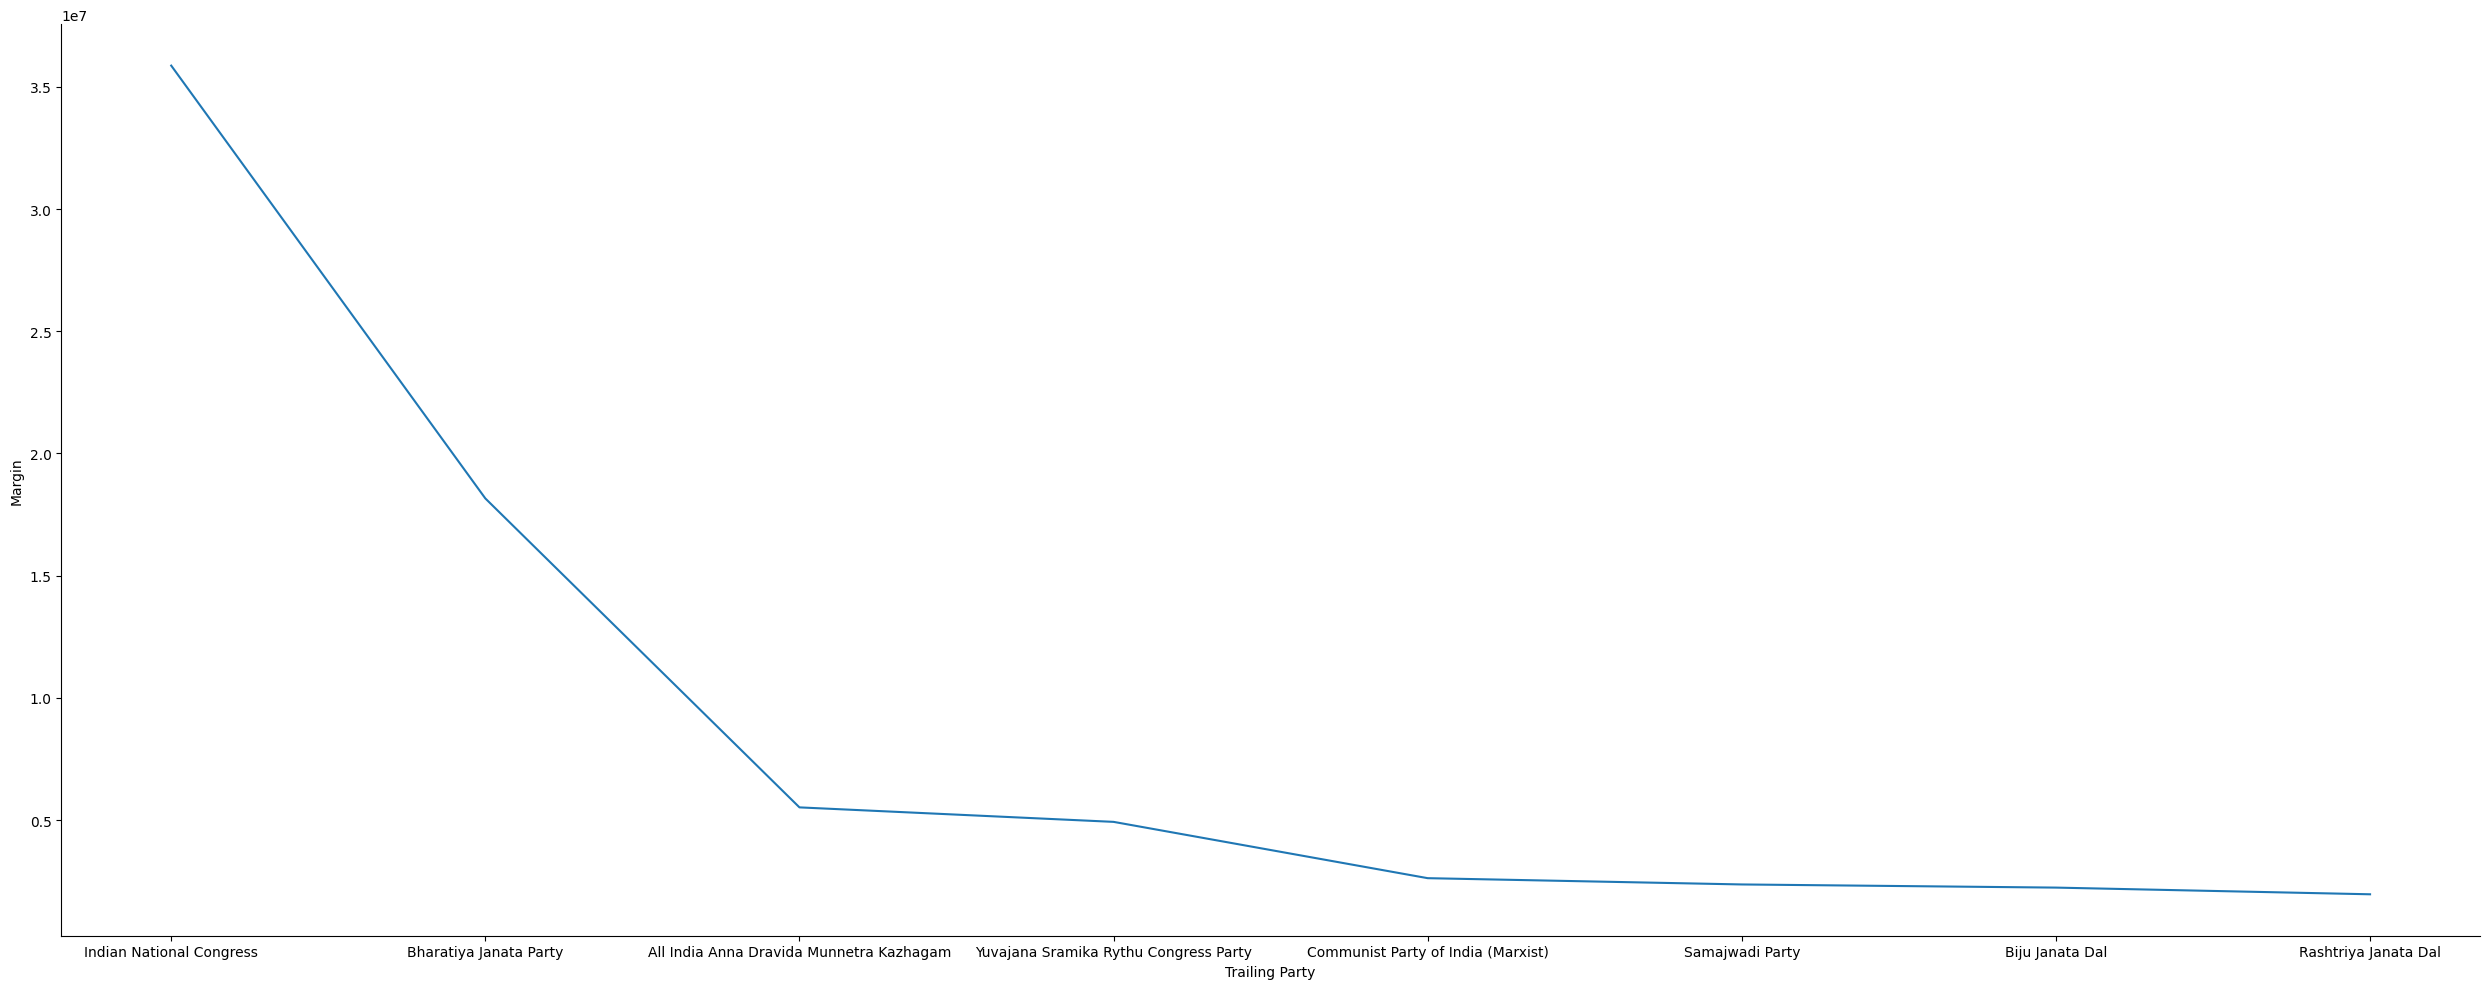

In [107]:
sns.relplot(x = 'Trailing Party', y = 'Margin', data = Trailplot, kind = 'line', height = 10, aspect = 2.5)

([<matplotlib.patches.Wedge at 0x7a3478b30940>,
 [Text(-0.8740146635506384, 0.6679059573760849, 'Aam Aadmi Party'),
  Text(-1.0088966045029775, 0.4383236719849419, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(-1.0762899504672534, 0.22715620731821864, 'All India Majlis-E-Ittehadul Muslimeen'),
  Text(-1.0842758312115466, 0.18532652764920032, 'All India Trinamool Congress'),
  Text(-1.0945888907403336, 0.1089732089453465, 'All India United Democratic Front'),
  Text(-1.0984480195486162, 0.05841188534641866, 'Amma Makkal Munnettra Kazagam'),
  Text(-1.0991824059123891, 0.04240328445594613, 'Apna Dal (Soneylal)'),
  Text(-1.0996839650452563, 0.026366209859286227, 'Assam Jatiya Parishad'),
  Text(-1.0987708772177822, -0.05198614602051076, 'Bahujan Samaj Party'),
  Text(-1.0895841416249195, -0.15101787417219065, 'Bharat Rashtra Samith'),
  Text(-0.7542307853303122, -0.8007096367972729, 'Bharatiya Janata Party'),
  Text(-0.03001297708272475, -1.099590478863214, 'Biju Janata Dal'),
  Te

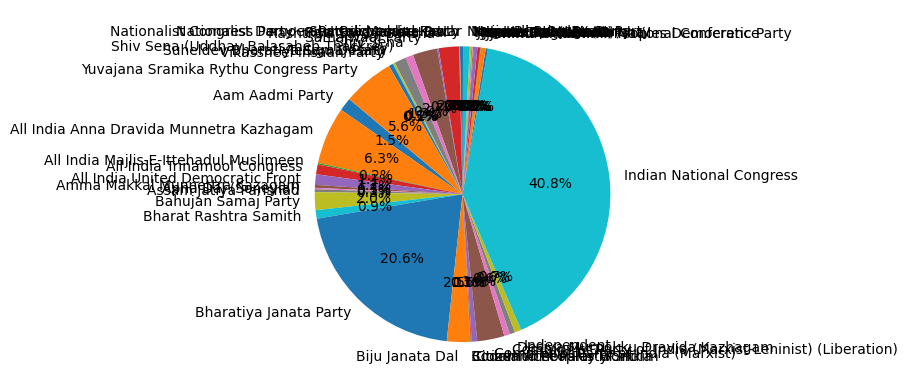

In [88]:
plt.pie(Trailing_votes['Margin'], labels = Trailing_votes['Trailing Party'], autopct = '%1.1f%%', startangle = 140)

**ENTER THE  CONSTITUEMCY TO GET CANDIDATES DETAILS**
===================================================



In [145]:
df['Constituency'] = df['Constituency'].astype(str)
df['Constituency'] = df['Constituency'].str.upper()

In [146]:
df[df['Constituency'] == 'AJMER'][['Leading Candidate','Leading Party','Margin']]

,Leading Candidate,Leading Party,Margin
0,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,329991.0


In [147]:
Ask = str(input('Enter constituency name:__'))
Ask = Ask.upper()
if(Ask in df['Constituency'].values):
  op = df[df['Constituency'] == Ask][['Leading Candidate','Leading Party','Margin']]
  print(op)
else:
  print('Invalid Name entered, Try Again !!')

Enter constituency name:__Bellary
   Leading Candidate             Leading Party   Margin
92        E. TUKARAM  Indian National Congress  98992.0
